<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/mushroom_Classification_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("/content/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
cat_col= df.select_dtypes(include=['object']).columns

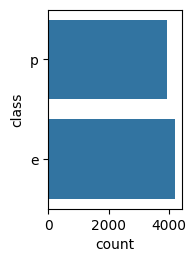

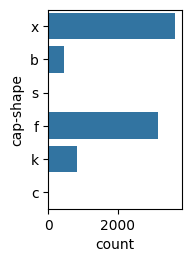

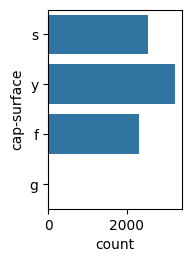

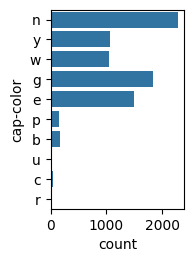

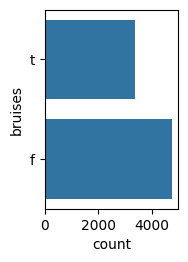

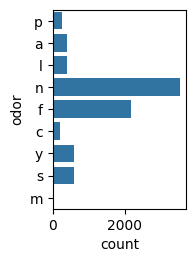

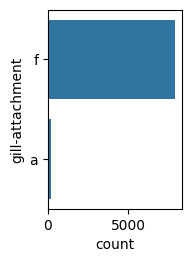

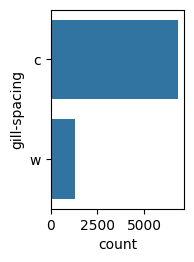

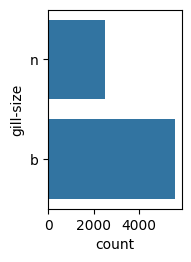

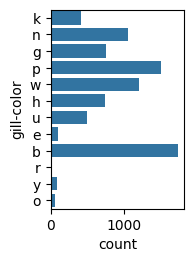

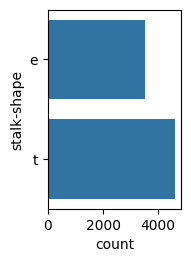

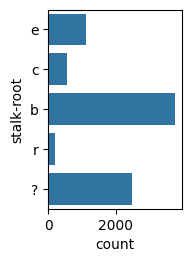

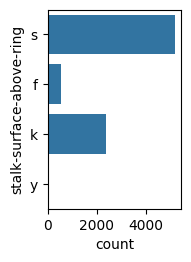

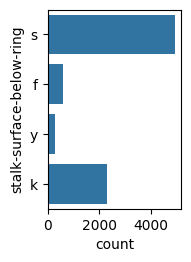

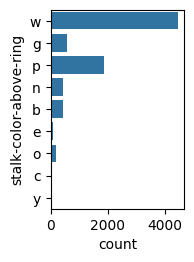

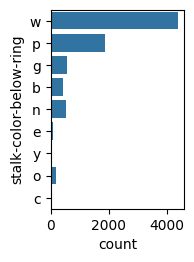

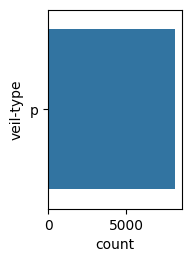

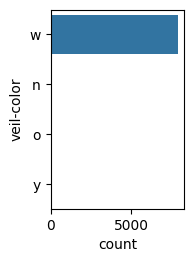

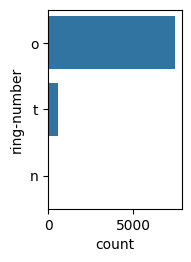

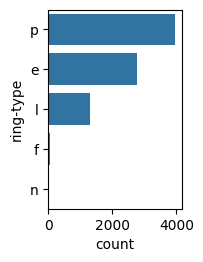

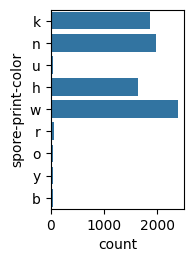

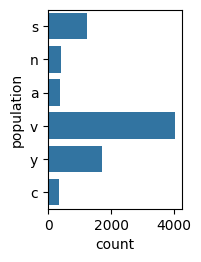

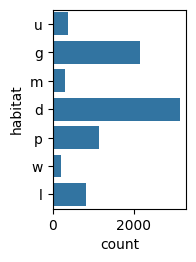

In [10]:
for i, col in enumerate(cat_col):
    plt.figure(figsize=(10,15))
    plt.subplot(5,5,i+1)
    sns.countplot(df[col])
    plt.show()

In [11]:
X= df.drop(['class'], axis=1)
y=df["class"]

In [12]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le= LabelEncoder()
y= le.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
DT= DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
DT.fit(X_train, y_train)
y_pred= DT.predict(X_test)
a_s= accuracy_score(y_test, y_pred)
a_s

0.9809230769230769

In [23]:
from sklearn.tree import plot_tree

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.284\nsamples = 3666\nvalue = [627, 3039]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[63] <= 0.5\ngini = 0.124\nsamples = 3221\nvalue = [213.0, 3008.0]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.044\nsamples = 3077\nvalue = [69, 3008]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 144\nvalue = [144, 0]'),
 Text(0.46153846153846156, 0.375, 'x[105] <= 0.5\ngini = 0.13\nsamples = 445\nvalue = [414.0, 31.0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 414\nvalue = [414, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.065\nsamples = 2833\nvalue = [2738, 95]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.026\nsamples 

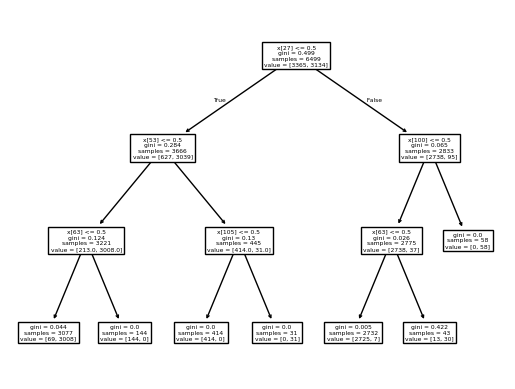

In [24]:
plot_tree(DT)

In [26]:
dt_en= DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dt_en.fit(X_train, y_train)
y_pred= dt_en.predict(X_test)
a_s_en= accuracy_score(y_test, y_pred)
a_s_en

0.9513846153846154

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.66\nsamples = 3666\nvalue = [627, 3039]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.974\nsamples = 1054\nvalue = [627, 427]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.918\nsamples = 640\nvalue = [213, 427]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 414\nvalue = [414, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2612\nvalue = [0, 2612]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.212\nsamples = 2833\nvalue = [2738, 95]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.102\nsamples = 2775\nvalue = [2738, 37]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.026\nsamples = 2732\nvalue = [2725, 7]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.884

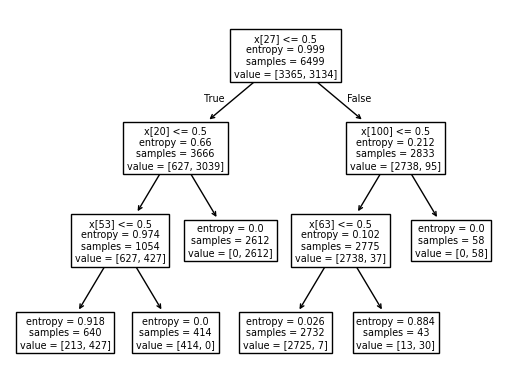

In [29]:
plot_tree(dt_en)